<h1> Test Technique Alternance Data Scientist </h1>

<h2> Randy TCHUISSEU </h2>

<h3> Importations et Traitement des données</h3>

Imports

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fonctions
from os import getcwd, chdir, listdir

In [2]:
# données
#path_data = 'sample_data'
conso22 = pd.read_csv('pdl_2.csv',encoding='utf-8-sig', sep = ',')
conso23 = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',')
conso22.shape[0]

35040

Prétraitement des données

In [3]:
conso23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  105120 non-null  object 
 1   value      105120 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [4]:
conso22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  35040 non-null  object 
 1   value      35040 non-null  float64
dtypes: float64(1), object(1)
memory usage: 547.6+ KB


In [22]:
def preprocess(data:pd.DataFrame):
  data['time'] = pd.to_datetime(data['timestamp'],errors= 'coerce', format='%Y-%m-%d %H:%M:%S%z',utc =True)
  data['month'] = data['time'].dt.strftime('%m')
  data['value'] = data['value'].astype(float)

In [23]:
preprocess(conso22)
preprocess(conso23)

In [24]:
conso22.head()

,timestamp,value,time,year_month,month
0,2022-01-01 00:00:00+01:00,3.733333,2021-12-31 23:00:00+00:00,2021-12,12
1,2022-01-01 00:30:00+01:00,4.000000,2021-12-31 23:30:00+00:00,2021-12,12
2,2022-01-01 01:00:00+01:00,3.733333,2022-01-01 00:00:00+00:00,2022-01,01
3,2022-01-01 01:30:00+01:00,4.000000,2022-01-01 00:30:00+00:00,2022-01,01
4,2022-01-01 02:00:00+01:00,3.733333,2022-01-01 01:00:00+00:00,2022-01,01


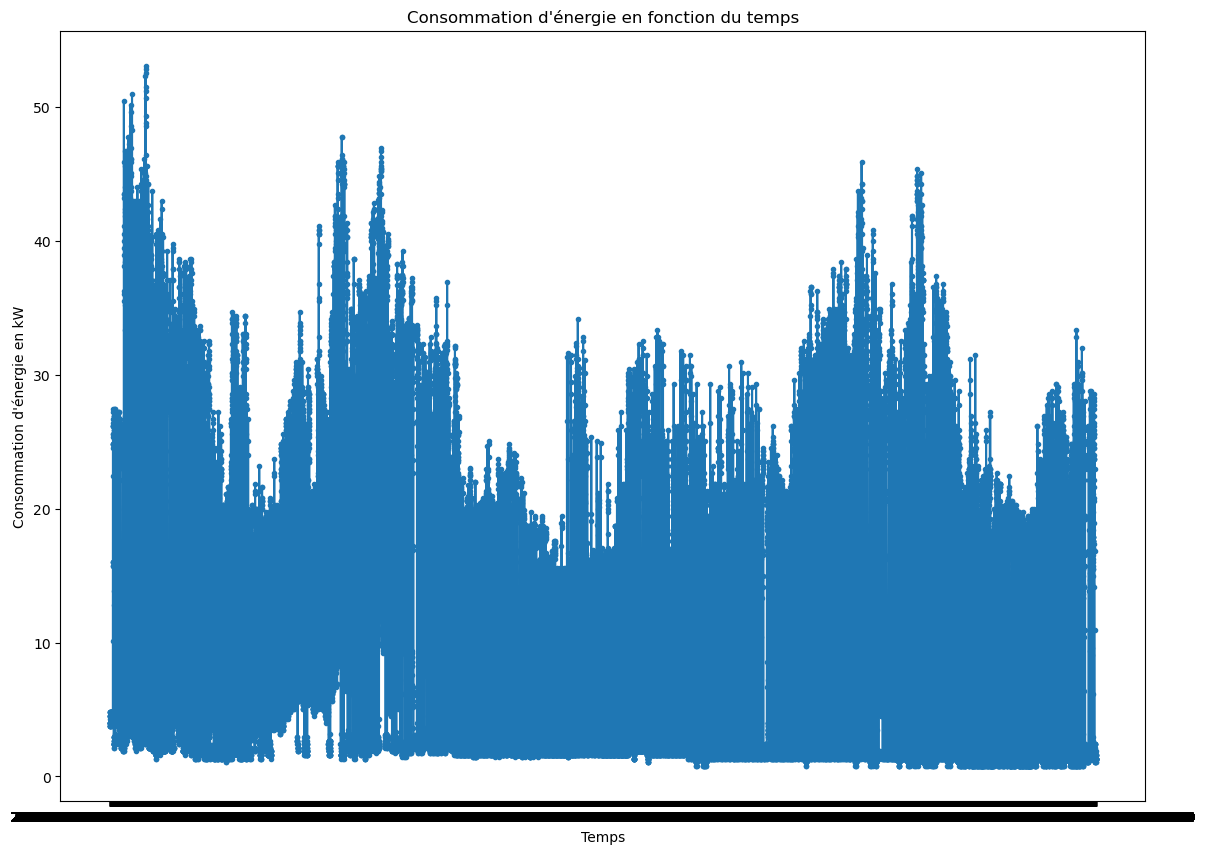

In [21]:
plt.figure(figsize=(14,10))
plt.plot(conso22['timestamp'], conso22['value'], marker='.', linestyle='-')
plt.title('Consommation d\'énergie en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('Consommation d\'énergie en kW')
plt.show()

In [8]:
monthly_conso22 = conso22.groupby('year_month')['value'].sum()

monthly_conso23 = conso23.groupby('year_month')['value'].sum()

In [14]:
monthly_conso22.head()

year_month
2021-12        7.733333
2022-01    24439.466667
2022-02    19643.466667
2022-03    17288.266667
2022-04    14842.933333
Name: value, dtype: float64

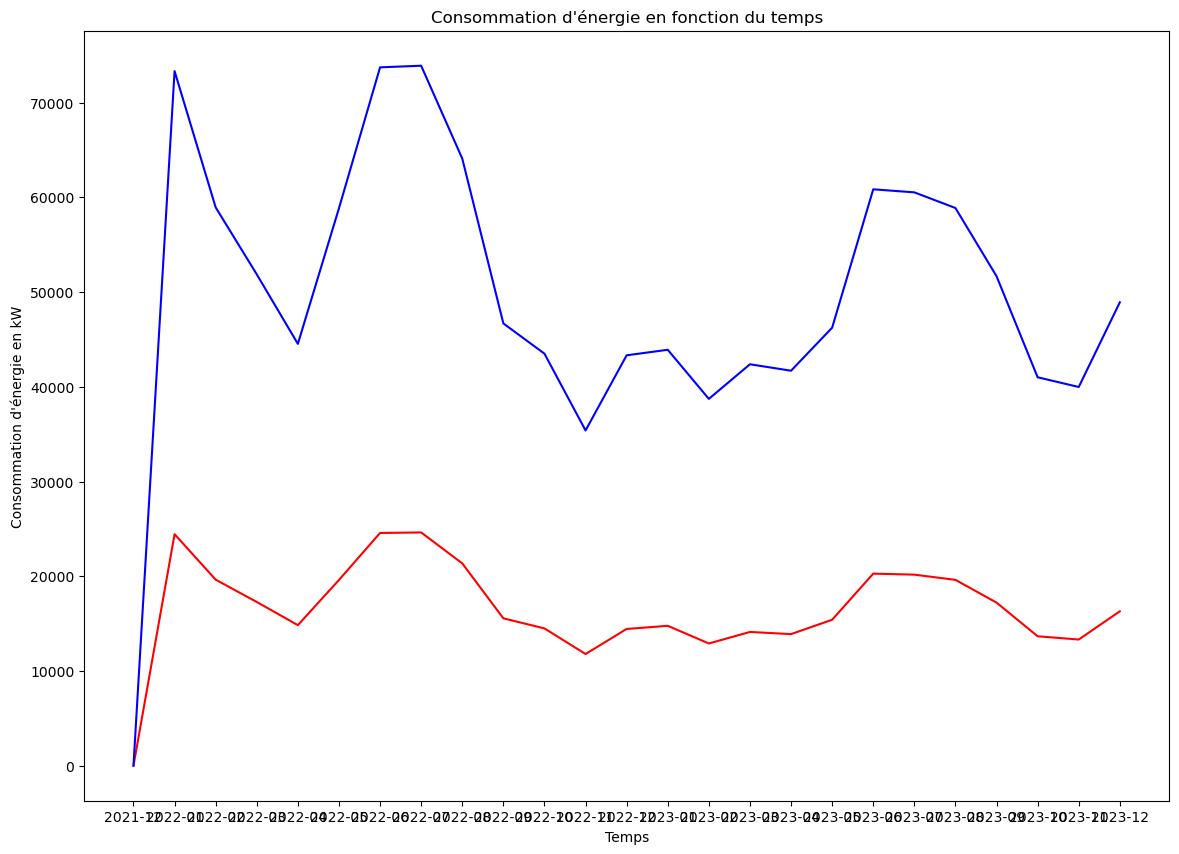

In [20]:
plt.figure(figsize=(14, 10))
plt.plot( monthly_conso22,'r-', monthly_conso23,'b-')
plt.title('Consommation d\'énergie en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('Consommation d\'énergie en kW')
plt.show()